In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import one_hot
import matplotlib.pyplot as py
from tensorflow.keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
import shutil
from tensorflow.keras.optimizers import Adam

def keep_first_n_images(directory, n):
    # Get the list of files in the directory
    files = os.listdir(directory)

    # Sort the files to ensure consistent order
    files.sort()

    # Keep the first n files and delete the rest
    for file_name in files[n:]:
        file_path = os.path.join(directory, file_name)
        os.remove(file_path)

directory_path = '/content/drive/MyDrive/data'


KeyboardInterrupt: 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

main_directory = '/content/drive/MyDrive/data'

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Use ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set the validation split
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    main_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify 'training' for training data
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    main_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' for validation data
)

Found 8993 images belonging to 5 classes.
Found 2246 images belonging to 5 classes.


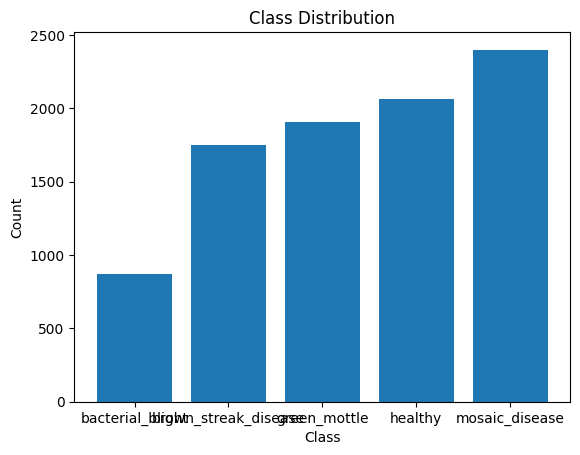

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get the class indices from the generator
class_indices = train_generator.class_indices

# Invert the dictionary to map class indices to class labels
class_labels = {v: k for k, v in class_indices.items()}

# Get the class counts from the generator
class_counts = train_generator.classes

# Count occurrences of each class
unique_classes, counts = np.unique(class_counts, return_counts=True)

# Map class indices to class labels for plotting
class_labels_for_plot = [class_labels[idx] for idx in unique_classes]

# Plot the bar graph
plt.bar(class_labels_for_plot, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [ ]:



# Define your CNN model using TensorFlow's Keras API
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 4 classes for diseases
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # Set the number of epochs
)


Epoch 1/10
281/281 [==============================] - 3045s 11s/step - loss: 1.8414 - accuracy: 0.2541 - val_loss: 1.5499 - val_accuracy: 0.2580
Epoch 2/10
281/281 [==============================] - 1115s 4s/step - loss: 1.5407 - accuracy: 0.2870 - val_loss: 1.4978 - val_accuracy: 0.3246
Epoch 3/10
281/281 [==============================] - 1101s 4s/step - loss: 1.4640 - accuracy: 0.3304 - val_loss: 1.4412 - val_accuracy: 0.3442
Epoch 4/10
281/281 [==============================] - 1107s 4s/step - loss: 1.4200 - accuracy: 0.3594 - val_loss: 1.4187 - val_accuracy: 0.3634
Epoch 5/10
281/281 [==============================] - 1058s 4s/step - loss: 1.3864 - accuracy: 0.3804 - val_loss: 1.4003 - val_accuracy: 0.3701
Epoch 6/10
 91/281 [========>.....................] - ETA: 10:28 - loss: 1.3781 - accuracy: 0.3846